In [1]:
from Classifier import Classifier
from Email import Email
import settings
import os
from datetime import datetime
import pytz
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [2]:
# Create a list of filepaths for all emails
emails = list()
for root, dirs, files in os.walk(settings.CORPUS_PATH+'/maildir', topdown = True):
    for name in files:
        if not name.startswith('.'):
            emails.append(os.path.join(root, name))

## Incorrect dates
The following cell shows the percentage of emails which have incorrect dates, and which years appear in these incorrect dates.

In [6]:
noEarlyEmails = 0
noLateEmails = 0
earlyYearsSent = defaultdict(int)
lateYearsSent = defaultdict(int)

earlyCutoff = datetime(1990, 1, 1, 0, 0)
earlyCutoff = pytz.timezone('US/Eastern').localize(earlyCutoff)

lateCutoff = datetime(2003, 1, 1, 0, 0)
lateCutoff = pytz.timezone('US/Eastern').localize(lateCutoff)

for filepath in emails:
    em = Email(filepath[10:])
    date = em.getDateTz()
    
    if date < earlyCutoff:
        noEarlyEmails += 1
        earlyYearsSent[date.year] += 1
    if date > lateCutoff:
        noLateEmails += 1
        lateYearsSent[date.year] += 1
print(str("%.2f" % (((noEarlyEmails+noLateEmails)/len(emails))*100)) + '% of emails were sent before 1/1/1990 or after 1/1/2003')

print('Years used in incorrect dates before 1990:')
for key in sorted(earlyYearsSent.keys()):
    print('{0}: {1}'.format(key, earlyYearsSent[key]))
    
print('Years used in incorrect dates after 2003:')
for key in sorted(lateYearsSent.keys()):
    print('{0}: {1}'.format(key, lateYearsSent[key]))

0.17% of emails were sent before 1/1/1990 or after 1/1/2003
Years used in incorrect dates before 1990:
1: 213
2: 58
1979: 522
1986: 2
Years used in incorrect dates after 2003:
2004: 70
2005: 1
2007: 1
2012: 2
2020: 2
2024: 1
2043: 1
2044: 3


## Time
The following cells show the time of day emails were sent to Enron email addresses (those ending in 'enron.com') compared to those sent to non-Enron email addresses.

In [6]:
time0 = datetime(2000,1,1,0,0).time()
time3 = datetime(2000,1,1,3,0).time()
time6 = datetime(2000,1,1,6,0).time()
time9 = datetime(2000,1,1,9,0).time()
time12 = datetime(2000,1,1,12,0).time()
time15 = datetime(2000,1,1,15,0).time()
time18 = datetime(2000,1,1,18,0).time()
time21 = datetime(2000,1,1,21,0).time()

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

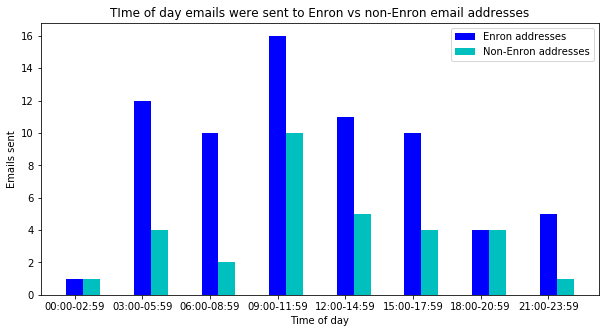

In [50]:
# Time of day emails were sent to Enron vs non-Enron addresses
enronTimes = {'00:00-02:59':0, '03:00-05:59':0, '06:00-08:59':0, '09:00-11:59':0, '12:00-14:59':0, '15:00-17:59':0, '18:00-20:59':0, '21:00-23:59':0}
nonEnronTimes = {'00:00-02:59':0, '03:00-05:59':0, '06:00-08:59':0, '09:00-11:59':0, '12:00-14:59':0, '15:00-17:59':0, '18:00-20:59':0, '21:00-23:59':0}
sampleEmails = random.sample(emails, 100) # take a sample of 5000 emails
for filepath in sampleEmails:
    em = Email(filepath[10:])
    recipient = em.getFeature('To')
    date = em.getDateTz()
    if recipient.endswith('enron.com'):
        if date.time() >= time0 and date.time() < time3:
            enronTimes['00:00-02:59'] += 1
        elif date.time() >= time3 and date.time() < time6:
            enronTimes['03:00-05:59'] += 1
        elif date.time() >= time6 and date.time() < time9:
            enronTimes['06:00-08:59'] += 1
        elif date.time() >= time9 and date.time() < time12:
            enronTimes['09:00-11:59'] += 1
        elif date.time() >= time12 and date.time() < time15:
            enronTimes['12:00-14:59'] += 1
        elif date.time() >= time15 and date.time() < time18:
            enronTimes['15:00-17:59'] += 1
        elif date.time() >= time18 and date.time() < time21:
            enronTimes['18:00-20:59'] += 1
        else:
            enronTimes['21:00-23:59'] += 1
    else:
        if date.time() >= time0 and date.time() < time3:
            nonEnronTimes['00:00-02:59'] += 1
        elif date.time() >= time3 and date.time() < time6:
            nonEnronTimes['03:00-05:59'] += 1
        elif date.time() >= time6 and date.time() < time9:
            nonEnronTimes['06:00-08:59'] += 1
        elif date.time() >= time9 and date.time() < time12:
            nonEnronTimes['09:00-11:59'] += 1
        elif date.time() >= time12 and date.time() < time15:
            nonEnronTimes['12:00-14:59'] += 1
        elif date.time() >= time15 and date.time() < time18:
            nonEnronTimes['15:00-17:59'] += 1
        elif date.time() >= time18 and date.time() < time21:
            nonEnronTimes['18:00-20:59'] += 1
        else:
            nonEnronTimes['21:00-23:59'] += 1
            
plt.figure(figsize=(10,5))
X = np.arange(8)
plt.bar(X+0.00, enronTimes.values(), color='b', width=0.25, label='Enron addresses')
plt.bar(X+0.25, nonEnronTimes.values(), color='c', width=0.25, label='Non-Enron addresses')
plt.ylabel('Emails sent')
plt.xlabel('Time of day')
plt.title('TIme of day emails were sent to Enron vs non-Enron email addresses')
plt.xticks(np.arange(8), (enronTimes.keys()))
plt.legend(loc='upper right')
plt.show()

The following cells compare the times emails were sent both with and without the time zone conversion using the same sample of emails.
Converting the times from Pacific time zone to Eastern time zone gives more expected results (with most emails sent within office hours, as opposed to early morning).

In [20]:
timeSample = random.sample(emails, 1000)

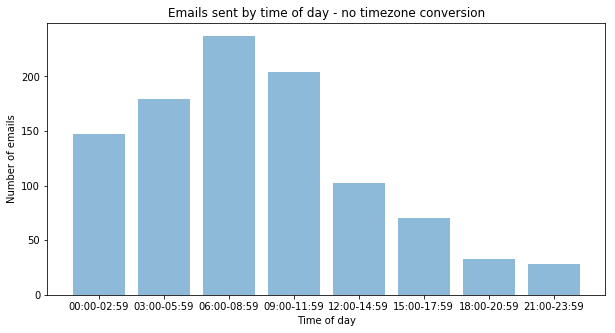

In [21]:
# plot times emails were sent with no timezone conversion
timesNoTz = {'00:00-02:59':0, '03:00-05:59':0, '06:00-08:59':0, '09:00-11:59':0, '12:00-14:59':0, '15:00-17:59':0, '18:00-20:59':0, '21:00-23:59':0}

for filepath in timeSample:
    em = Email(filepath[10:])
    emailTime = (em.getDateTz()).astimezone(pytz.timezone('US/Pacific')).time()
    if emailTime >= time0 and emailTime < time3:
        timesNoTz['00:00-02:59'] += 1
    elif emailTime >= time3 and emailTime < time6:
        timesNoTz['03:00-05:59'] += 1
    elif emailTime >= time6 and emailTime < time9:
        timesNoTz['06:00-08:59'] += 1
    elif emailTime >= time9 and emailTime < time12:
        timesNoTz['09:00-11:59'] += 1
    elif emailTime >= time12 and emailTime < time15:
        timesNoTz['12:00-14:59'] += 1
    elif emailTime >= time15 and emailTime < time18:
        timesNoTz['15:00-17:59'] += 1
    elif emailTime >= time18 and emailTime < time21:
        timesNoTz['18:00-20:59'] += 1
    else:
        timesNoTz['21:00-23:59'] += 1

plt.figure(figsize=(10,5))
plt.bar(timesNoTz.keys(), timesNoTz.values(), align='center', alpha=0.5)
plt.ylabel('Number of emails')
plt.xlabel('Time of day')
plt.title('Emails sent by time of day - no timezone conversion')
plt.show()

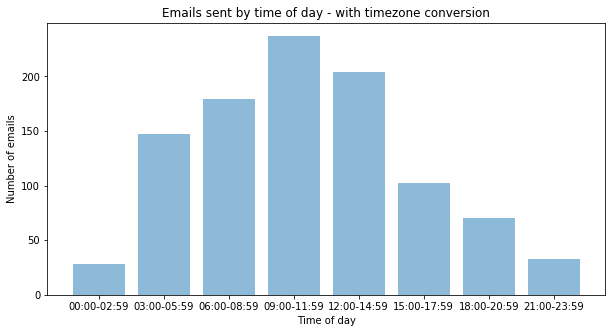

In [22]:
# plot times emails were sent with timezone conversion
timesTz = {'00:00-02:59':0, '03:00-05:59':0, '06:00-08:59':0, '09:00-11:59':0, '12:00-14:59':0, '15:00-17:59':0, '18:00-20:59':0, '21:00-23:59':0}

for filepath in timeSample:
    em = Email(filepath[10:])
    emailTime = em.getDateTz().time()
    if emailTime >= time0 and emailTime < time3:
        timesTz['00:00-02:59'] += 1
    elif emailTime >= time3 and emailTime < time6:
        timesTz['03:00-05:59'] += 1
    elif emailTime >= time6 and emailTime < time9:
        timesTz['06:00-08:59'] += 1
    elif emailTime >= time9 and emailTime < time12:
        timesTz['09:00-11:59'] += 1
    elif emailTime >= time12 and emailTime < time15:
        timesTz['12:00-14:59'] += 1
    elif emailTime >= time15 and emailTime < time18:
        timesTz['15:00-17:59'] += 1
    elif emailTime >= time18 and emailTime < time21:
        timesTz['18:00-20:59'] += 1
    else:
        timesTz['21:00-23:59'] += 1
        
plt.figure(figsize=(10,5))
plt.bar(timesTz.keys(), timesTz.values(), align='center', alpha=0.5)
plt.ylabel('Number of emails')
plt.xlabel('Time of day')
plt.title('Emails sent by time of day - with timezone conversion')
plt.show()

## Classifier
The below cell shows how the classifier can be run on a sample of emails.

In [3]:
cla = Classifier() # initialise the classifier
cla.trainModel() # train the classifier
sampleEmails = random.sample(emails, 50) # get 50 random emails

65.7559198542805
53.38253382533825
56.91126279863481
67.76180698151951
71.98515769944342
Overall accuracy: 63.159336231843305


In [4]:
# For each email in the sample, print each line along with the classifier's prediction
for filepath in sampleEmails:
    email = Email(filepath[10:])
    predictions = cla.predictEmail(filepath[10:])
    for i in range(email.getNoLines()):
        print(email.getLine(i+1) + ' : ' + predictions[i][0])
    print('---next email---')

Tana, : g
 : se
I have inter-officed a few documents to you.  Enclosed in the envelope you  : b
will find signed copies of the NASDAQ & Dow Jones Enterprise agreements for  : tb
content which we are currently receiving on EnronOnline.  I believe you had  : b
stated that you would keep the originals and then send us a copy for our  : tb
records.    : b
 : se
I have also enclosed the original affidavits from the winners of the latest  : tb
EnronOnline competition - Load the Bases. : tb
 : se
Let me know if you have any questions. : tb
 : se
Make It A Great Day!! : tb
lorie : b
---next email---
"Sacramento or Salem?"  Sort of has a nice ring to it. : b
---next email---
lsharma@sprynet.com : th
---next email---
Ben, : tg
 : se
- Did you talk to Berney about heat rate(10500 vs 10200)? : tb
- Will Garrett run 5x8 or 7x8? : tb
---next email---
Start Date: 4/26/01; HourAhead hour: 12;  HourAhead schedule download failed.  : b
Manual intervention required. : tb
---next email---
Zimin, : g
 : se

Calif DWR Seen Asking PUC To Order 25% Rate Increase Fri : b
By Jason Leopold : tb
 : se
07/13/2001 : b
Dow Jones Energy Service : so
(Copyright (c) 2001, Dow Jones & Company, Inc.) : tb
 : se
Of DOW JONES NEWSWIRES : so
(This article was originally published earlier Friday.) : tb
 : se
LOS ANGELES -(Dow Jones)- The California Department of Water Resources, the : tb
agency purchasing a bulk of the state's power needs in lieu of the three : tb
investor-owned utilities, is expected to tell state regulators Friday that : b
they need to increase electricity rates by as much as 25%. : b
 : se
This is because there are insufficient funds in the current revenue stream : b
to cover a $13.4 billion bond sale, three commissioners with the Public : b
Utilities Commission told Dow Jones Newswires late Thursday. : tb
 : se
PUC President Loretta Lynch is expected to issue a draft decision Friday : b
either endorsing the rate hike request or calling for an audit of the DWR's : tb
current revenue stre

---------------------- Forwarded by Sara Shackleton/HOU/ECT on 12/17/99 09:27  : th
AM --------------------------- : th
    : th
	 : th
	 : th
	From:  Larry Joe Hunter                           12/16/99 07:32 PM : th
	 : th
 : se
To: Sara Shackleton/HOU/ECT@ECT, Elizabeth Sager/HOU/ECT@ECT, Stuart  : th
Zisman/HOU/ECT@ECT : th
cc: Rodney Malcolm/HOU/ECT@ECT, Bob Bowen/HOU/ECT@ECT  : th
Subject: Merrill Lynch Draft : th
 : se
To all, : tg
 : se
The enclosed is the unreviewed Draft.  Please send comments to Sara  : tb
Shackleton at your convenience. : tb
 : se
thanks, : tso
Joe Hunter : b
 : se
 : se
---next email---
Carol, : so
 : se
I spoke with Glen Mackey this morning.  For both the Canada-Canada and US-US  : b
agreements, we will have mutual collateral thresholds of $9MM. : b
 : se
Paul : tso
 : se
 -----Original Message----- : th
From:  St Clair, Carol   : th
Sent: Thursday, May 17, 2001 11:03 AM : th
To: Radous, Paul : th
Subject: Engage Energy America LLC - Enron Power Marketing 

---------------------- Forwarded by Vince J Kaminski/HOU/ECT on 06/26/2000  : th
03:04 PM --------------------------- : th
 : se
 : se
Jlpnymex@aol.com on 06/26/2000 01:27:41 PM : th
To: Vince.J.Kaminski@enron.com : th
cc:   : th
Subject: Re: contact : th
 : se
 : se
Vince, : tg
The weekend of July 15, 2000 is fine for us.  Which day is better for : b
you--Friday or Saturday? : tb
 : se
Do you want to go to the Woodlands for a show, or just visit?  Also, let me : b
know if I can bring something. : tb
 : se
Thanks and we look forward to meeting your family. : tb
 : se
jana : b
---next email---
---------------------- Forwarded by Vince J Kaminski/HOU/ECT on 12/22/2000  : th
04:34 PM --------------------------- : th
 : se
 : se
	Clayton Vernon @ ENRON : th
	12/21/2000 03:51 PM : th
	 : th
To: Vince J Kaminski/HOU/ECT@ECT : th
cc:   : th
Subject: f/up : th
 : se
Vince- : tg
 : se
I got your message (I was up on the roof of the building helping to fix the  : tb
weather satellite dish- what 